## vision transformer (https://arxiv.org/pdf/2010.11929.pdf)

In [1]:
import timm
import torch

/opt/conda/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /opt/conda/lib/python3.8/site-packages/torchvision/image.so: undefined symbol: _ZNK3c1010TensorImpl36is_contiguous_nondefault_policy_implENS_12MemoryFormatE
  warn(f"Failed to load image Python extension: {e}")


In [24]:
vit = timm.create_model("vit_tiny_patch16_224")
print('the number of model parameters: {:,}'.format(sum([p.data.nelement() for p in vit.parameters()])))
print(vit.blocks[0].attn.num_heads)
print(vit.embed_dim)
print()

vit = timm.create_model("vit_small_patch16_224")
print('the number of model parameters: {:,}'.format(sum([p.data.nelement() for p in vit.parameters()])))
print(vit.blocks[0].attn.num_heads)
print(vit.embed_dim)
print()

vit = timm.create_model("vit_base_patch16_224")
print('the number of model parameters: {:,}'.format(sum([p.data.nelement() for p in vit.parameters()])))
print(vit.blocks[0].attn.num_heads)
print(vit.embed_dim)
print()
# print(vit)
# x = torch.randn((1,3,224,224))
# x1 = vit.patch_embed(x)
# print(x1.shape)
# print(x1[0,0,0])
# x2 = vit._pos_embed(x1)
# print(x2.shape)
# print(x2[0,0,0])
# print(vit.pos_embed.shape)
# print(vit.pos_embed[0,0,0])


the number of model parameters: 5,717,416
3
192

the number of model parameters: 22,050,664
6
384

the number of model parameters: 86,567,656
12
768



torch.Size([151296])


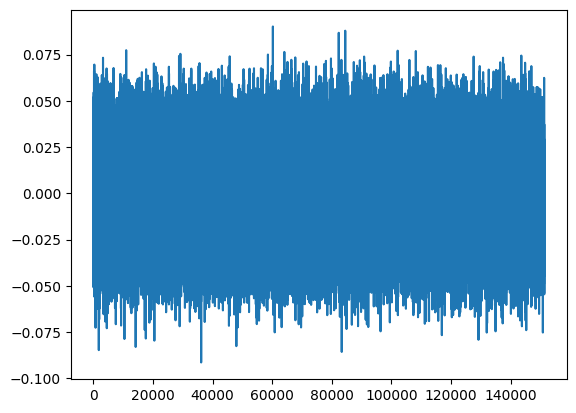

In [15]:
print(vit.pos_embed.flatten(0).shape)
import matplotlib.pyplot as plt
plt.plot(vit.pos_embed.flatten(0).detach().cpu())

In [23]:
vit.blocks[0].

Attention(
  (qkv): Linear(in_features=768, out_features=2304, bias=True)
  (attn_drop): Dropout(p=0.0, inplace=False)
  (proj): Linear(in_features=768, out_features=768, bias=True)
  (proj_drop): Dropout(p=0.0, inplace=False)
)

In [95]:
x = torch.ones((3,1,2,2))
print(x)
print("-"*100)


def drop_path(x, drop_prob: float = 0., training: bool = False, scale_by_keep: bool = True):
    """Drop paths (Stochastic Depth) per sample (when applied in main path of residual blocks).
    This is the same as the DropConnect impl I created for EfficientNet, etc networks, however,
    the original name is misleading as 'Drop Connect' is a different form of dropout in a separate paper...
    See discussion: https://github.com/tensorflow/tpu/issues/494#issuecomment-532968956 ... I've opted for
    changing the layer and argument names to 'drop path' rather than mix DropConnect as a layer name and use
    'survival rate' as the argument.
    """
    if drop_prob == 0. or not training:
        return x
    keep_prob = 1 - drop_prob
    shape = (x.shape[0],) + (1,) * (x.ndim - 1)  # work with diff dim tensors, not just 2D ConvNets
    random_tensor = x.new_empty(shape).bernoulli_(keep_prob)
    print(random_tensor.shape)
    print(random_tensor)
    print('-'*100)
    if keep_prob > 0.0 and scale_by_keep:
        random_tensor.div_(keep_prob)
    print(random_tensor.shape)
    print(random_tensor)
    print('-'*100)
    return x * random_tensor


x = drop_path(x, 0.8, True, True)
print(x)
print('-'*100)

tensor([[[[1., 1.],
          [1., 1.]]],


        [[[1., 1.],
          [1., 1.]]],


        [[[1., 1.],
          [1., 1.]]]])
----------------------------------------------------------------------------------------------------
torch.Size([3, 1, 1, 1])
tensor([[[[0.]]],


        [[[1.]]],


        [[[0.]]]])
----------------------------------------------------------------------------------------------------
torch.Size([3, 1, 1, 1])
tensor([[[[0.]]],


        [[[5.]]],


        [[[0.]]]])
----------------------------------------------------------------------------------------------------
tensor([[[[0., 0.],
          [0., 0.]]],


        [[[5., 5.],
          [5., 5.]]],


        [[[0., 0.],
          [0., 0.]]]])
----------------------------------------------------------------------------------------------------


In [29]:
shape = (2,) + (1,) * (3)
print(shape)
print(x.new_empty(shape).shape)

(2, 1, 1, 1)
torch.Size([2, 1, 1, 1])
